# Radar
## Introduction
Radio detection and ranging (RADAR) is a system which transmit electromagnetic energy to determine the distance (range) to an object.  Compared to electro/optical (passive) sensors which detect and receive natural energy, radar emits and receives its own energy. 

**TODO: ADD PICTURES OF RADARS**  

Radar utilizes the radio wave band of the electromagnetic spectrum:  

![electromagnetic_spectrum](./images/electromagnetic-spectrum-wavelengths.jpg)  

The wavelength of the transmitted wave is given by:
$$\lambda = c/f $$

where:
* $\lambda$ is the wavelength of the wave in meters
* $c$ is the speed of light in meters/sec
* $f$ is the frequency of the wave in Hz


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import warnings

warnings.filterwarnings('ignore')
%matplotlib ipympl

def plot_freq(frequency=2):
    t = np.linspace(0, 1, 301)
    x = np.sin(2 * np.pi * frequency * t)
    
    plt.figure(num='Frequency', clear=True)
    plt.plot(t, x)
    plt.ylabel('Amplitude (Volts)')
    plt.xlabel('Time (s)')
    plt.grid()
    plt.show()

widgets.interact(plot_freq, frequency=(1.0, 10.0))

interactive(children=(FloatSlider(value=2.0, description='frequency', max=10.0, min=1.0), Output()), _dom_clas…

<function __main__.plot_freq(frequency=2)>

Radar often utilizes the following frequency bands:
| frequency band name | frequency range (GHz) | uses |
| ------------------  | --------------------- | ---- | 
| L | 1-2 | long rainge air surveilane |
| S | 2-4 | airport radar |
| C | 4-8 | mobile military radars |
| X | 8-12 | imaging radars |
| K_u | 12-18 | imaging radars |
| K | 18-27 | airfield surveillance |
| K_a | 27-40 | airfield surveillance |
| V | 40-75 | too much atmospheric attenuation |
| W | 75-110 | automotive radar |
| mmw | 110-300 | experimental radars |

Most commonly used frequency band for spaceborne radar is X band.  X band provides the following adventageous properties:
* Large enough frequence band for fine range resolution
* Small enough wavelength to get fine scattering detail
* Low attenuation from atmosphere!  

![electromagnetic_absorption](./images/atmospheric_absorption.png)  



### RADR basic operating procedure 
Radar will send out electromagnetic energy over a period of time then wait for the energy to reflect off of an object and come back to the radar.  

![electromagnetic_absorption](./images/radar_ranging.webp)  

Radars measure the distance of the object by computing how long it takes to for the pulse to propogate to an object then reflect off of it.  Details of radar ranging will be discussed in more depth in subsequent notebooks.

### Doppler effect
https://en.wikipedia.org/wiki/Doppler_radar

## Radar Sytem components

### Discussion on dB
Signals received by radars are often very weak in strength (on the order of micro volts), so to make math and understanding of relative signal strength a metric known as decibels (dB) is used (https://en.wikipedia.org/wiki/Decibel).  Decibel is a measurement of relative strength in the logarithmic scale and is not an absolute value.  

Decibels are computed in two different ways depending if you're working with power or voltage:
$$\text{Power (dB):} = 10\log_{10}{\frac{P_2}{P_1}}$$
$$\text{Voltage (dB):} = 20\log_{10}{\frac{V_2}{V_1}}$$

Where decibals become very powerful is for example instead of saying a signal is 1,000,00 times stronger you can say a signal is 60 dB stronger.  

#### Key note!
Since decibels operate in logarithmic scale remember:
 * addition in dB is equivalent to multiplication in linear scale!
 * subtraction in dB is equivalent to division in linear scale!

Some common examples are:
* 10 dB increase -> 10x the power
* 10 db decrease -> 1/10th the power
* 3 db decrease ~ 0.5x the power
* 3 db increase ~ 2x the power

To convert from dB back to linear scale we use the following equations
$$\frac{P_2}{P_1} = 10^{\frac{\text{dB}}{10}}$$
$$\frac{V_2}{V_1} = 10^{\frac{\text{dB}}{20}}$$

### Example radar system
A very simplistic block diagram of a radar can be seen below:  

![block_diagram](./images/radar_block_diagram.png)  

We'll now focus on building intuition behind each one of the system components

### Signal Generators
A signal generator is a device which generates the waveform we want to transmit.  These devices are usually digital to analog converters (DAC) where they generate a waveform digitally and convert it to an analog signal.  For radar there are a few common waveforms that are used:
* continuous wave (CW): $x(t) = e^{j\omega t}$
* chirp: $x(t) = e^{j\gamma t^2}$  

These waveforms will be explored more in depth in later sessions
### Filters
Filters are devices which allow selection of specific frequencies.  Filters will allow signals with certain frequency content pass throguh them and heavily attenuate frequency content outside of the operating range.  Filters are often used in radar systems for:
* ensuring the signal contains only a specific range of frequencies before going into a system component
* Image rejection after mixing
* Preselecting frequency ranges

There are three common types of filters used for radars:
* Lowpass 
    - allows low frequencies through and attenuates high frequencies
* Highpass 
    - allows high frequencies through and attenuates low frequencies
* Bandpass
    - allows a specific range of frequencies through and attenuates everything else


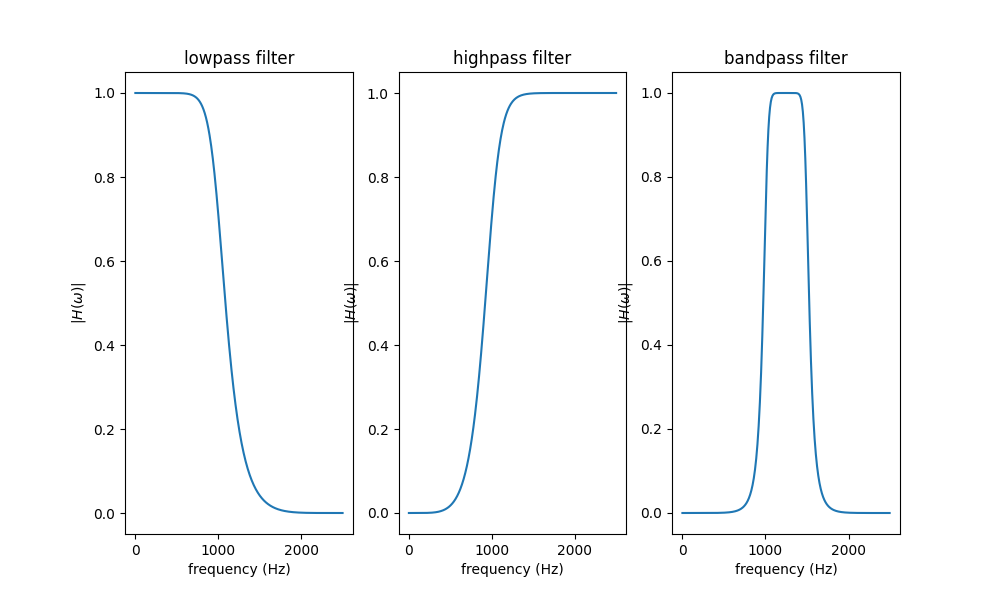

In [2]:
from scipy.signal import butter, freqz, lfilter
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

def db(x):
    return 20 * np.log10(np.abs(x))
    
fs=5000
order=5

b_low, a_low = butter(order, fs/5, btype='low', fs=fs)
freq, lowpass_filter = freqz(b_low, a_low, fs=fs)

b_high, a_high = butter(order, fs/5, btype='high', fs=fs)
freq, highpass_filter = freqz(b_high, a_high, fs=fs)

b_band, a_band = butter(order, [1000, 1500], btype='band', fs=fs)
freq, bandpass_filter = freqz(b_band, a_band, fs=fs)

fig, axs = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(10, 6),
    num='Filters',
    clear=True
)
axs = axs.ravel()
axs[0].plot(freq, np.abs(lowpass_filter))
axs[0].set_xlabel('frequency (Hz)')
axs[0].set_ylabel('$|H(\omega)|$')
axs[0].set_title('lowpass filter')

axs[1].plot(freq, np.abs(highpass_filter))
axs[1].set_xlabel('frequency (Hz)')
axs[1].set_ylabel('$|H(\omega)|$')
axs[1].set_title('highpass filter')

axs[2].plot(freq, np.abs(bandpass_filter))
axs[2].set_xlabel('frequency (Hz)')
axs[2].set_ylabel('$|H(\omega)|$')
axs[2].set_title('bandpass filter')
plt.show()


In [3]:
duration = 1
num_samples = fs * duration

def show(signal_freq=2000):
    t = 1 / fs * np.arange(num_samples) 
    f = fs * np.fft.fftshift(np.fft.fftfreq(num_samples))
    x = np.cos(2 * np.pi * signal_freq * t)

    fig, axs = plt.subplots(
        nrows=2,
        ncols=2,
        figsize=(14, 14),
        sharey=True,
        num='Filters of Freq',
        clear=True
        
    )
    axs = axs.ravel()
    
    axs[0].plot(f, np.abs(np.fft.fftshift(np.fft.fft(x))))
    axs[0].set_xlabel('frequency (Hz)')
    axs[0].set_ylabel('$|X(\omega)|$')
    axs[0].set_title('Input signal ' + f'$x(t) = \cos(2\pi {signal_freq} t)$')
    
    lp_filtered = lfilter(b_low, a_low, x) / (0.5*x.size)
    hp_filtered = lfilter(b_high, a_high, x) / (0.5*x.size)
    bp_filtered = lfilter(b_band, a_band, x) / (0.5*x.size)
    
    axs[1].plot(f, fs/2 * np.abs(np.fft.fftshift(np.fft.fft(lp_filtered))))
    axs[1].set_xlabel('frequency (Hz)')
    axs[1].set_ylabel('$|H(\omega) \cdot X(\omega)|$')
    axs[1].set_title('lowpass filter')
    
    axs[2].plot(f, fs/2 * np.abs(np.fft.fftshift(np.fft.fft(hp_filtered))))
    axs[2].set_xlabel('frequency (Hz)')
    axs[2].set_ylabel('$|H(\omega) \cdot X(\omega)|$')
    axs[2].set_title('highpass filter')
    
    axs[3].plot(f, fs/2 * np.abs(np.fft.fftshift(np.fft.fft(bp_filtered))))
    axs[3].set_xlabel('frequency (Hz)')
    axs[3].set_ylabel('$|H(\omega) \cdot X(\omega)|$')
    axs[3].set_title('bandpass filter')
    plt.tight_layout()
    plt.show()

widgets.interact(show, signal_freq=(0, 2000))

interactive(children=(IntSlider(value=2000, description='signal_freq', max=2000), Output()), _dom_classes=('wi…

<function __main__.show(signal_freq=2000)>

### Mixers
Mixers are a three port device which can be used to convert an input signal's frequency either higher or lower than the orignal signal. The process of converting a high frequency signal to a lower frequency signal is known as downconversion.  Conversly, the process of converting a lower frequency signal to a higher frequency is known as up conversion:  

![mixer_conversion](./images/conversion.jpg)  
The governing equation to determine the frequency of the signal at the output of the mixer is:
$$f_{out} = |nf_{1} \pm mf_{2}|$$
Where:
* $f_1$ is the frequecny of the signal at port 1
* $f_{2}$ is the frequency of the signal at port 2
* $m$ is the integer harmonic number for frequency $f_1$
* $n$ is the integer harmonic number for frequency $f_2$

Up/down conversion is achieved by injecting a single tone $\cos(2\pi f t)$ into one port of the mixer and the signal to convert into another port.  A device which emits a single tone (signal with a constant configured frequency) is known as a local oscillator (LO)  

Some nomenclature:
* Signal with higher frequency is denoted by $f_{RF}$
* Signal with lower (intermediate) frequency is denoted by $f_{IF}$
* Signal with constant frequency is denoted by $f_{LO}$  

With these conventions we define the following equations for up/down conversion:

**up conversion**
$$f_{RF} = f_{LO} \pm f_{IF}$$

**down conversion**
$$f_{IF} = f_{LO} \pm f_{RF}$$

#### Image frequencies
https://en.wikipedia.org/wiki/Superheterodyne_receiver#Image_frequency_(fIMAGE)

**high side injection**
High side injection occurs when $f_{LO} > f_{RF}$ and its image frequency is computed as:
$$f_{image} = f_{RF} + 2f_{IF}$$

**low side injection**
Low side injection occurs when $f_{LO} < f_{RF}$ and its image frequency is computed as:
$$f_{image} = f_{RF} - 2f_{IF}$$

How do we fix this? Filters!

**TODO: EXAMPLES AND TALK ABOUT IMAGE FREQUENCYS AND HOW YOU CAN USE FILTERS TO REJECT MIXING IMAGES!!**

### Amplifiers
An amplifier is a device which can increase the magnitude of an input signal.  Amplifiers are used mainly right before the antenna before the signal is transmitted to get the highest amount of power before the signal propagates through free space and also at the receiver to amplifier the very faint signal received.   

For an amplifier with gain $G$, if an input signal $x(t)$ was sent through an amplifier then after the signal would be $Gx(t)$  

https://en.wikipedia.org/wiki/Amplifier

### Antennas
An antenna is a device which will convert the travelling wave in the radar circuitry into a wave which propogates through free space.  For the scope of this discussion you can consider an antenna like a flashlight which focuses brightness in a particular area.  Antennas will be discussed in greater depth in subsequent discussions  

https://en.wikipedia.org/wiki/Antenna_(radio)

### Analog to digital to converter
An analog to digital converter (ADC) is the device which will convert the received signal from a continousus signal to a discrete signal.  You can think of an ADC as a device that will record the voltage of a signal every X seconds.  The output of the ADC is what we use to process data.  

https://en.wikipedia.org/wiki/Analog-to-digital_converter

### Putting it all together
With all of that knowledge we'll now return to the block diagram from earlier and explain how it works

![block_diagram](./images/radar_block_diagram.png)  

**TODO: PROBABLY DRAW ON WHITEBOARD FREQUENCY PLAN FOR THIS SYSTEM**


## Radar Range equation
One of the most important equations for radar system design is the radar range equation.  The radar range equation is used for determining the power received by the radar after reflecting off a point at some distance away from the radar.  The radar range equation is:
$$P_r = \frac{P_{t} G_{t} G_{r} \sigma \lambda^2}{(4\pi)^3 R_{tx}^2R_{rx}^2}$$

Where:
* $P_t$ is the transmit power of the radar
    - Units: Watts
* $G_t$ is the transmit gain of the antenna
    - This can be broken up into Tx/Rx antenna gain if different antennas are used
    - Units: Unitless
* $\sigma$ is the radar cross section (RCS) of the object that the signal reflected off of
    - Units: meters^2 
    - This is the cross sectional area of the object
* $\lambda$ is the wavelength of the transmit waveform
    - Units: meters
* $R_{tx}$ is the distance from the transmitter to the object
    - Units: meters
* $R_{rx}$ is the distance from the object to the receiver
    - Units: meters

**TODO: ADD A PICTURE HERE SUPPORTING DERIVATION**

### What's so special about this?
With this equation we can figure out how we need to design our system such that we can meet design criteria such as max range, operating frequency, antenna design, ...

### Derivation
For this derivation we'll start by defining power density as power per area:
$$S = \frac{Power}{Area} $$

### 1. Transmitter
We'll start by assuming that our antenna radiates energy isotropically which means that it radiates energy evenly in all directions.  Since it radiates a spherical wave evenly in all directions (recall the surface area of a sphere is $4\pi r^2$) this leads to a power density of:
$$S = \frac{Power}{Area} = \frac{P_t}{4\pi R^2} $$
Now, isotropic antennas are physically impossible, so our antenna will be focusing energy in a specific direction.  The amount of energy that the antenna is focusing the overall power $P_t$ by is denoted as gain $G$.  If we add that to our equation we see:
$$S = \frac{P_t G}{4\pi R^2} $$

This is the first part of the radar range equation which tells us the amount of incident power density at a target at a distance of $R$ away from the radar.

### 2. Target
The signal we transmit will hit an object then reflect back to the radar.  This means that the power density at the receiver will depend on how much the target reflects back and then the distance from the target back to the radar.  The reflected wave will be a spherically radiating wave with power density:
$$S = \frac{Power}{Area} = \frac{\sigma}{4\pi R^2}$$
the target RCS ($\sigma$) denotes how reflective the object is and how strong the return will be to the radar.  RCS is a function of material and also incidence angle the wave hits the object.  This contribution to the range equation will denote how much power the radar sees at the receiver 

### 3. Receiver
The final part is to define how well our receive antenna does at receiving the signal reflected from the target.  This is defined by the antenna's effective aperature which is defined as:
$$A_e = \frac{G\lambda^2}{4\pi}$$

### 4. Putting it all together
Now with each piece in mind, we can compute the received power at the radar by multiplying each term togehter since each one happens one after another in time.  This gives us:
$$P_r = \underbrace{\frac{P_t G_t}{4\pi R^2}}_{\text{transmit power denisty}} \cdot \underbrace{\frac{\sigma}{4\pi R^2}}_{\text{receive power density}} \cdot \underbrace{\frac{G_r\lambda^2}{4\pi}}_{\text{effective aperture}}$$

Removing the notations we arrive at the same equation listed above!
$$P_r = \frac{P_{t} G_{t} G_{r} \sigma \lambda^2}{(4\pi)^3 R_{tx}^2R_{rx}^2}$$

## Signal to noise equation
One common quantity to characterize a system is its for a given target at a certain range.  Signal to noise ratio is defined as:
$$ SNR = \frac{S}{N} $$
which is the received signal power relative to the noise power. The **average** noise power of a system is defined as:
$$N = kB_{n}T_{n} $$
Where:
* $k$ is boltzmann's constant
* $B_n$ is the noise bandwidth of the system
* $T_n$ is the noise temperature of the system  

With the average noise power defined and the radar range equation defining the received power for a target we can derive the signal to noise ratio as:
$$SNR = \frac{P_r}{N} =  \frac{P_{t} G_{t} G_{r} \sigma \lambda^2}{(4\pi)^3 R_{tx}^2R_{rx}^2 kB_{n}T_{n} L}$$
## Max range 
A common consideration for radar systems is to determine the max range the radar can operate such that it receives a certain power for a given target.  To derive this we can set our desired received power to be $P_{d}$.  If we substitue $P_{d}$ for the received power in the radar range equation we get:
$$P_d = \frac{P_{t} G_{t} G_{r} \sigma \lambda^2}{(4\pi)^3 R_{tx}^2R_{rx}^2}$$
With this we will assume that the path to the target from the transmitter is the same distance as the path to the receiver and that the gain of the receive antenna is the same as the transmit antenna.  This leads to $G_r = G_t = G$ and $R_{tx} = R_{rx} = R$.  Substituting this in the equation above leads to:
$$P_d = \frac{P_{t} G^2 \sigma \lambda^2}{(4\pi)^3 R^4} $$
Now solving for $R$ leads to
$$R_{max} = \sqrt[4]{\frac{P_{t} G^2 \sigma \lambda^2}{(4\pi)^3 P_d}}$$

## Sytem losses
The keen eye will realize that there is an extra $L$ term in the signal to noise equation.  That term encompases general system losses due to hardware component.  

**TODO: TALK ABOUT NOISE FIGURE** https://en.wikipedia.org/wiki/Noise_figure

## Topic: System Design
- Design a radar system given constraints

* For a 1 m^2 target how far can the target be until it reaches 0 dB SNR?
    - Plz add example system from blue book when i get to work on monday

In [4]:
from scipy.constants import Boltzmann as k
import numpy as np
import matplotlib.pyplot as plt

ranges = np.linspace(1e3, 300e3, 101)

def show_distance(rcs=1, wavelength_m=0.5, bw_MHz=100, gain_tx=500, pwr_txr=500, T_n=850):
    def snr(r):
        return (pwr_txr * gain_tx**2 * rcs * wavelength_m**2) / ((4*np.pi)**3 * r**4 * k * T_n * (bw_MHz*10e6))

    plt.figure(num='Distance to target', clear=True)
    plt.plot(ranges / 1e3, 20 * np.log10(snr(ranges)), label='SNR')
    plt.hlines(0, ranges[0] / 1e3, ranges[-1] / 1e3, linestyles='--', color='r', label='0 dB SNR')
    plt.xlabel('Distance to target (km)')
    plt.ylabel('SNR (dB)')
    plt.legend()
    plt.tight_layout()
    plt.show()

widgets.interact(show_distance, rcs=(0.1, 10), wavelength_m=(0.01, 5), bw_MHz=(100, 500), gain_tx=(100, 10000), pwr_txr=(100, 1000), T_n=(300, 1000))

interactive(children=(FloatSlider(value=1.0, description='rcs', max=10.0, min=0.1), FloatSlider(value=0.5, des…

<function __main__.show_distance(rcs=1, wavelength_m=0.5, bw_MHz=100, gain_tx=500, pwr_txr=500, T_n=850)>

## Topic: RCS Calibration
The goal of RCS calibration is to remove all system specifics from the received power such that after calibration you only measure the radar cross section term.  This is achieved by measuring the RCS of a known target to compute the calibration constant, then using that constant to calibrate all subsequent data.  This is important because when looking at data you want to observe and work with RCS only since that is a property of the material/object itself.  Without calibrating out the system there is no way to accurately standardize your data.  

A sphere is typically used for calibration because its cross sectional area is constant no matter what direction you look at the sphere.  

To derive the calibration constant we start with the radar range equation!:  

\begin{equation}
    P_r = \frac{P_t G^2 \lambda^2}{(4\pi)^3 R^4}\sigma
\end{equation}  
For simplicity we bunch all the terms not related to RCS ($\sigma$) into a single term $K$
\begin{equation}
    P_r = K\sigma
\end{equation}  

If we know the theoretical RCS of an object $\sigma_{t}$ then we can divide both sides

\begin{equation}
    \frac{P_r}{\sigma_t} = K\frac{\sigma}{\sigma_t}
\end{equation}  

in theory $\frac{\sigma}{\sigma_t} = 1$, so
\begin{equation}
    \frac{P_r}{\sigma_t} = K
\end{equation}  

and for a sphere $\sigma_t = \pi r^2$, so our calibration constant $K$ is  

\begin{equation}
    K = \frac{P_r}{\pi r^2}
\end{equation}  

Knowing $K$ then we can measure the RCS of the calibration sphere as   

\begin{equation}  
    P_r = K\sigma \rightarrow \sigma_c  = \frac{P_r}{K} 
\end{equation}  

With the calibration RCS we can say  

\begin{equation}  
    \sigma_u = \frac{P_{r}^{u}}{P_{r}^{c}}\sigma_c 
\end{equation}  

or  

\begin{equation}  
    \sigma_u = \frac{P_{r}^{u}}{K}
\end{equation}

Now that we have derived the calibration constant and figured out a method to determine the RCS of any unknown object we will see a real life example of this.  In this example we will use a 8" diameter sphere to determine the calibration constant then try to estimate the RCS of an unknown object (12" diameter sphere).

## Load data

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def db(x):
    return 20*np.log10(np.abs(x))

# Read data and convert to real/imaginary
data_file = 'radar_data/5_1_8s.txt'
tgt_file = 'radar_data/5_1_12s.txt'
bkg_file = 'radar_data/5_1_background.txt'

raw_data = np.loadtxt(fname=data_file, comments='%')
tgt_data = np.loadtxt(fname=tgt_file, comments='%')
bkg_raw_data = np.loadtxt(fname=bkg_file, comments='%')

In [6]:
n_col = 8
real_idx = np.arange(start=0, stop=n_col, step=2)
imag_idx = np.arange(start=1, stop=n_col, step=2)

data_freq = raw_data[:, real_idx] + 1.0j*raw_data[:, imag_idx]
bkg_data_freq = bkg_raw_data[:, real_idx] + 1.0j*bkg_raw_data[:, imag_idx]
tgt_freq = tgt_data[:, real_idx] + 1.0j*tgt_data[:, imag_idx]

# Estimate data supports
f_lo = 8e9
f_start = 0.75e9
f_stop = 2.25e9
t_start = 0
t_stop = 180e-9
n_pt = data_freq.shape[0]
freq_res = (f_stop - f_start)/n_pt
time_res = (t_stop - t_start)/n_pt

freq_vec = f_lo + np.linspace(f_start, f_stop, n_pt)
time_vec = np.linspace(t_start, t_stop, n_pt)


## Plot sphere frequency domain response

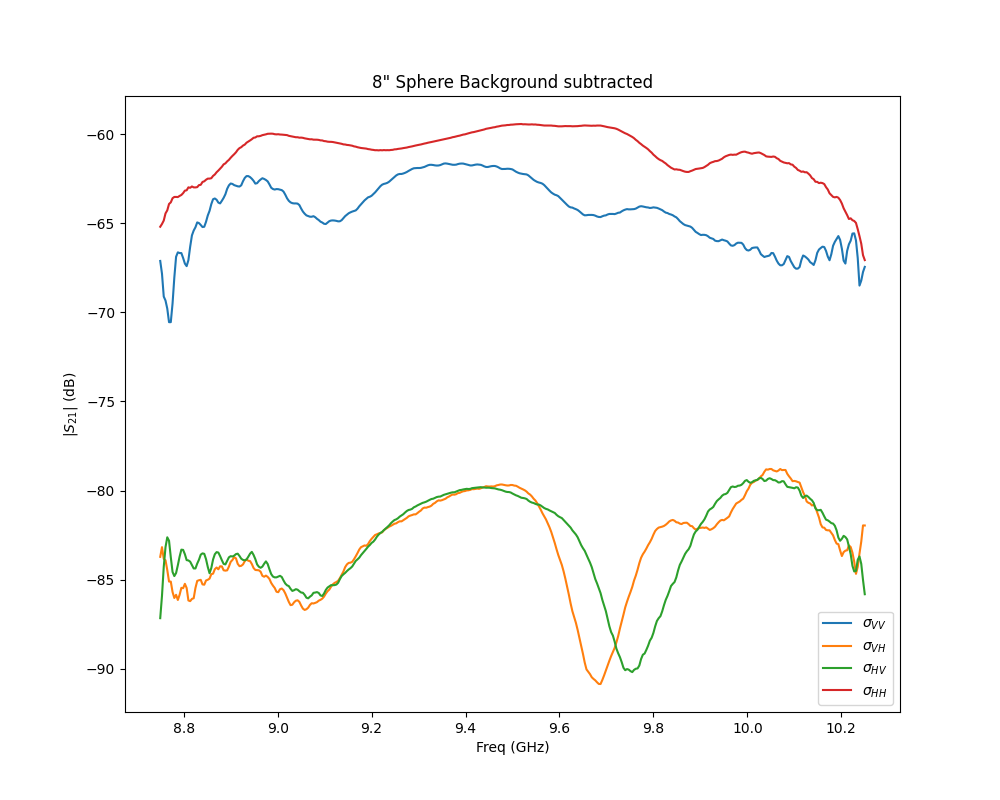

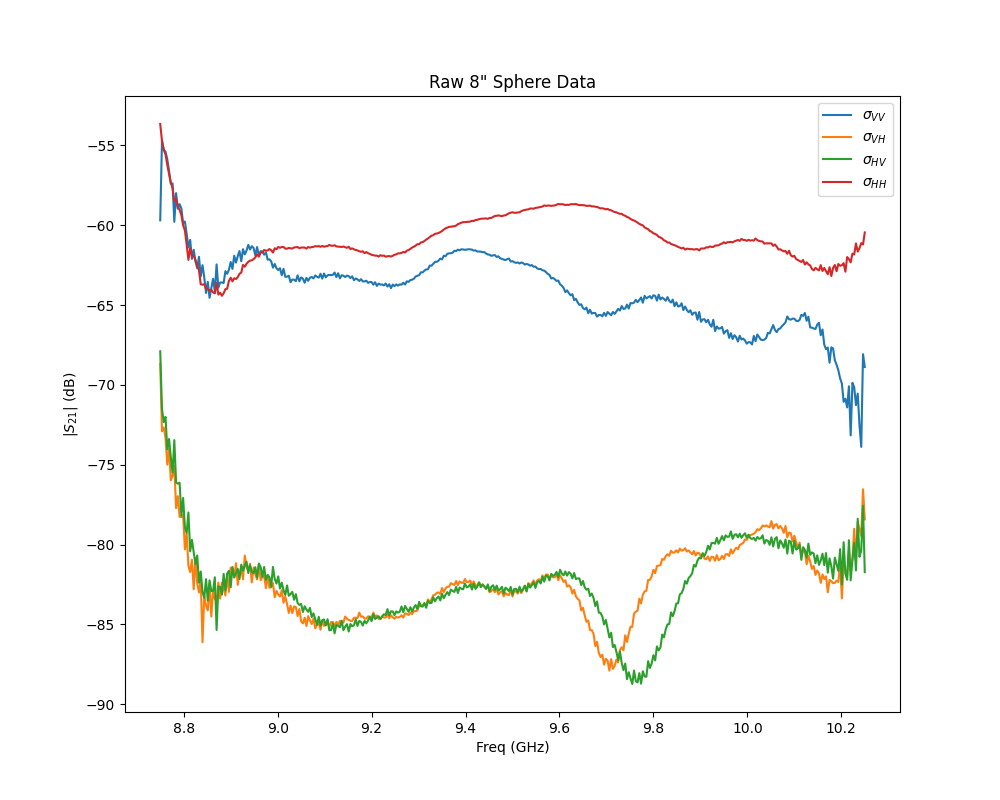

In [7]:
lgd_str = ['$\sigma_{VV}$', '$\sigma_{VH}$', '$\sigma_{HV}$', '$\sigma_{HH}$']
plt.figure(clear=True, figsize=(10,8))
plt.plot(freq_vec/1e9, db(data_freq))
plt.title('Raw 8\" Sphere Data')
plt.legend(lgd_str)
plt.ylabel('|$S_{21}$| (dB)')
plt.xlabel('Freq (GHz)')

plt.figure(clear=True, figsize=(10,8))
plt.plot(freq_vec/1e9, db(data_freq - bkg_data_freq))
plt.title('8\" Sphere Background subtracted')
plt.legend(lgd_str)
plt.ylabel('$|S_{21}|$ (dB)')
plt.xlabel('Freq (GHz)')
plt.show()

## Plot target time domain response

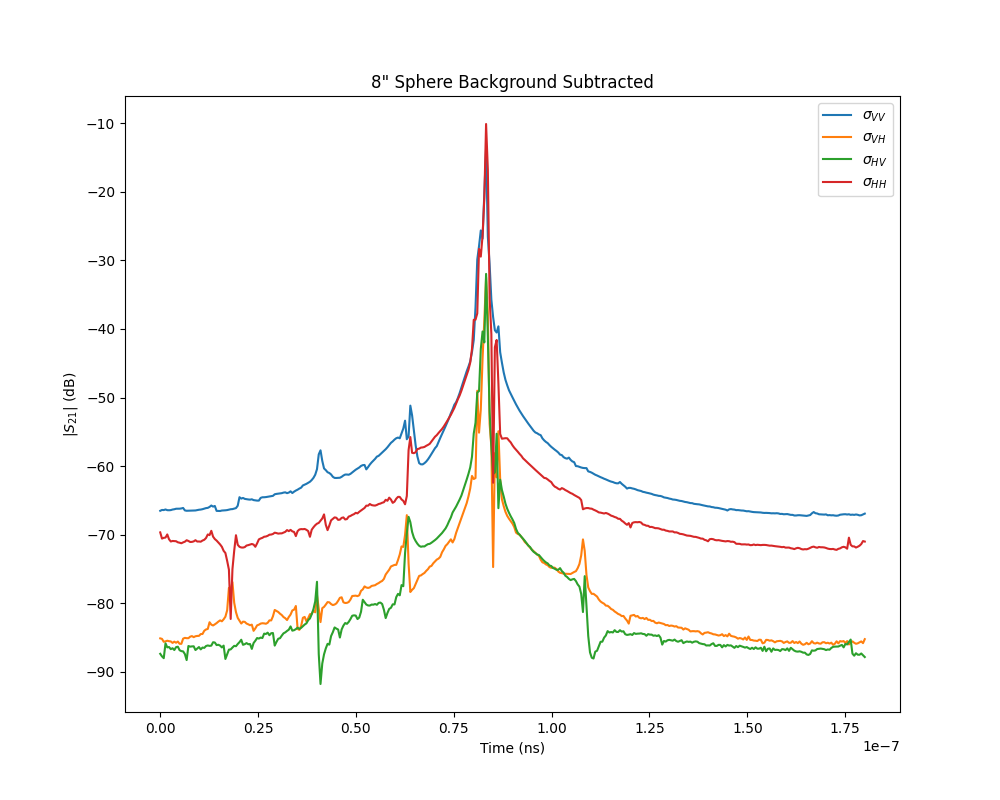

0.042884171271801864
0.03242927866223985
1.3223905384530037


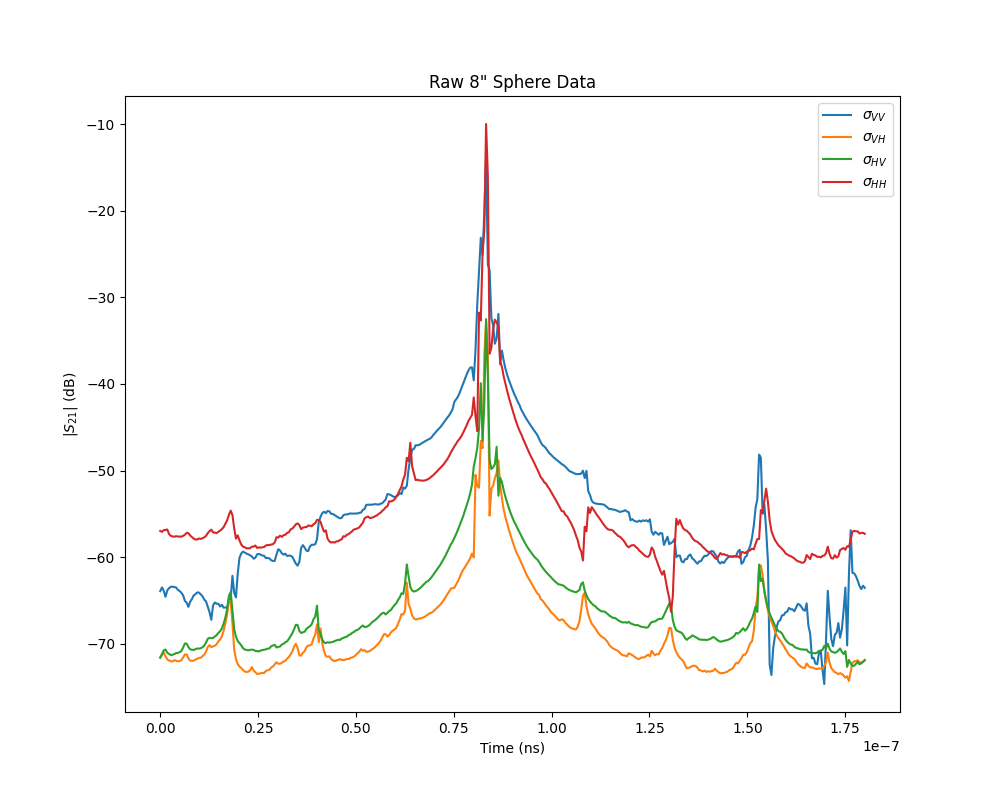

In [8]:
data_time = np.fft.fft(data_freq, axis=0)
bkg_data_time = np.fft.fft(bkg_data_freq, axis=0)

plt.figure(clear=True, figsize=(10,8))
plt.plot(time_vec, db(data_time))
plt.title('Raw 8\" Sphere Data')
plt.legend(lgd_str)
plt.ylabel('$|S_{21}|$ (dB)')
plt.xlabel('Time (ns)')

plt.figure(clear=True, figsize=(10,8))
plt.plot(time_vec, db(data_time - bkg_data_time))
plt.legend(lgd_str)
plt.title('8\" Sphere Background Subtracted')
plt.ylabel('$|S_{21}|$ (dB)')
plt.xlabel('Time (ns)')
plt.show()

# Calibration for VV
vv_idx = 0
bkg_sub = data_time - bkg_data_time
pwr_rec = np.max(np.abs(bkg_sub[:, vv_idx])**2)
in_to_m = 0.0254
radius = 4 * in_to_m
rcs_theor = np.pi * radius**2
print(pwr_rec)
print(rcs_theor)
cal_const_time = pwr_rec / rcs_theor
print(cal_const_time)


## Unkown target data

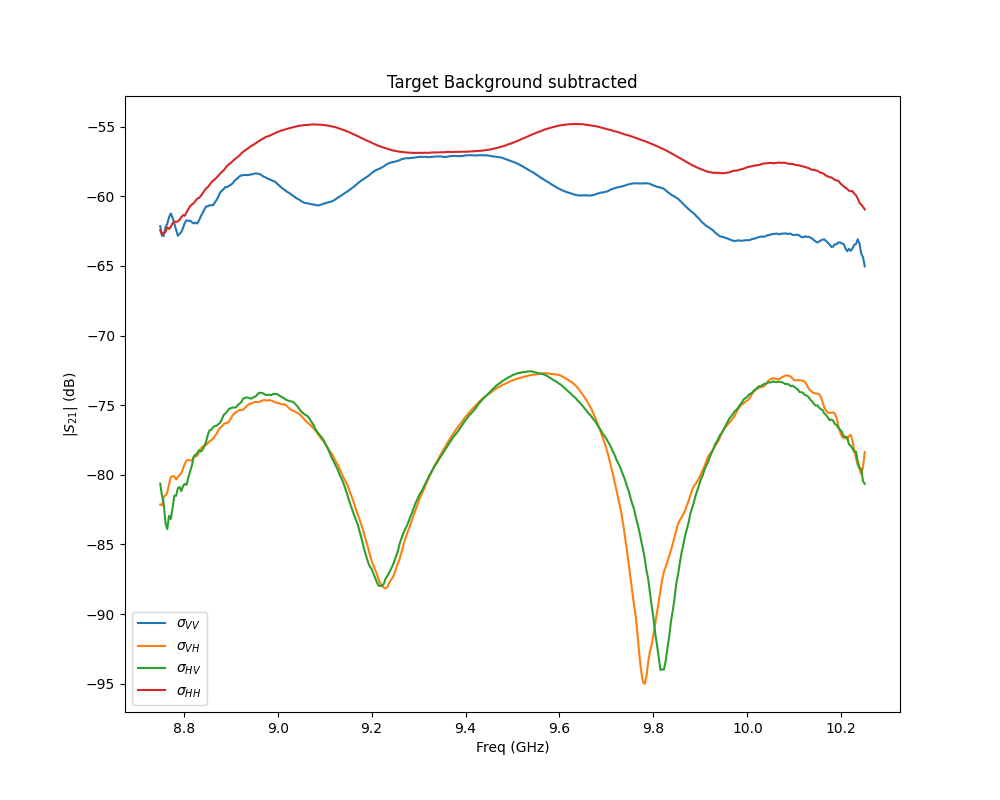

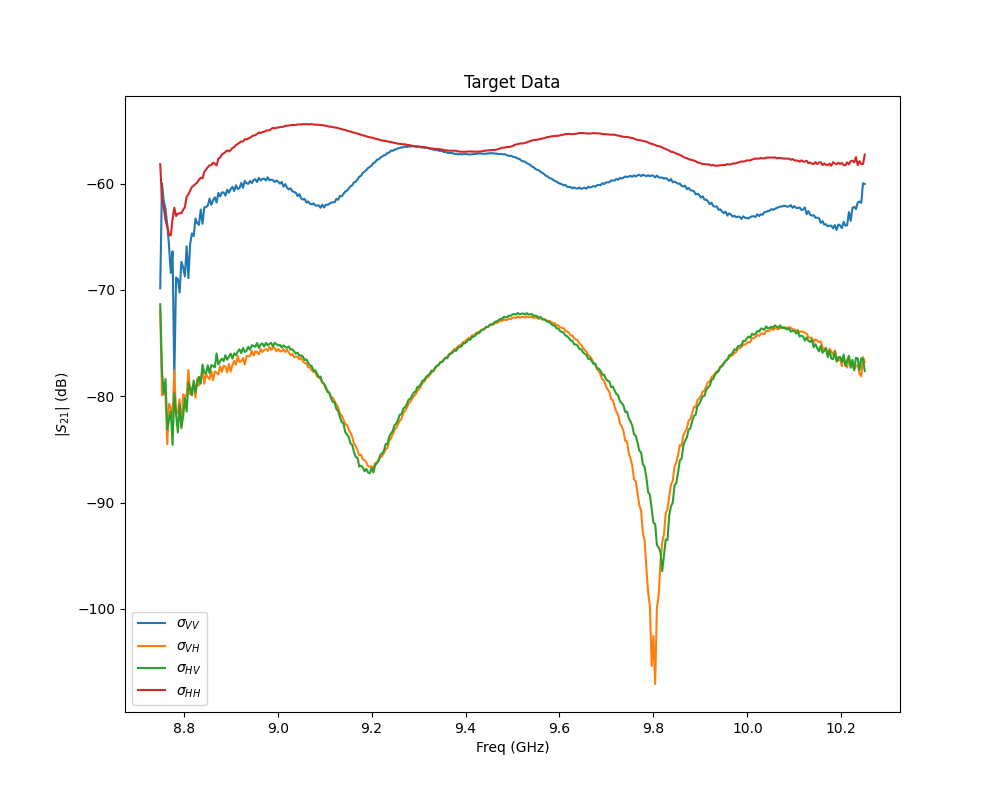

In [9]:
plt.figure(clear=True, figsize=(10,8))
plt.plot(freq_vec/1e9, db(tgt_freq))
plt.title('Target Data')
plt.legend(lgd_str)
plt.ylabel('|$S_{21}$| (dB)')
plt.xlabel('Freq (GHz)')

plt.figure(clear=True, figsize=(10,8))
plt.plot(freq_vec/1e9, db(tgt_freq - bkg_data_freq))
plt.title('Target Background subtracted')
plt.legend(lgd_str)
plt.ylabel('$|S_{21}|$ (dB)')
plt.xlabel('Freq (GHz)')
plt.show()


## Calibrate data and measure RCS

In [10]:
data_time = np.fft.fft(tgt_freq, axis=0)

bkg_sub = data_time - bkg_data_time
pwr_rec_tgt = np.max(np.abs(bkg_sub[:, vv_idx])**2)

radius = 6 * in_to_m
truth_rcs_tgt = np.pi*radius**2

tgt_rcs = pwr_rec_tgt/cal_const_time

print(f'RCS of target: {tgt_rcs:.3f} (m^2)')
print(f'RCS of 12\" sphere: {truth_rcs_tgt:.3f} (m^2)')


RCS of target: 0.075 (m^2)
RCS of 12" sphere: 0.073 (m^2)
